In [1]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [8]:
file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([0.1,0.1,0.3])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.13699631 0.12427445 0.31422815] [[0.33376368 0.18798932 0.45      ]]
The system is uncontrollable, the rank of the controllability matrix is 5.


In [11]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A,B)

[[ 0.99952614  0.         -0.         -0.          0.          0.
   0.          0.          0.        ]
 [ 0.          1.0006623   0.          0.         -0.          0.
   0.          0.          0.        ]
 [-0.          0.          0.9944283   0.         -0.         -0.
  -0.          0.          0.        ]
 [-0.          0.         -0.          1.0037539   0.00383053 -0.
   0.          0.         -0.        ]
 [-0.         -0.          0.         -0.51938885 -0.08891228  0.
   0.         -0.          0.        ]
 [-0.          0.         -0.          0.          0.          0.99847436
   0.00127436 -0.          0.        ]
 [-0.         -0.          0.         -0.          0.         -0.00140266
   1.00054    -0.          0.        ]
 [ 0.         -0.         -0.         -0.         -0.          0.
   0.          0.81084937  0.03585191]
 [-0.          0.          0.         -0.          0.          0.
  -0.          0.03665883  0.9938036 ]] [[ 0.00454386 -0.00040644]
 [-0.000436

In [6]:
Ae = np.linalg.eigvals(A)
print(Ae)

[-0.6671216 +0.j          0.05704826+0.j         -0.1561022 +0.12911077j
 -0.1561022 -0.12911077j -0.49422142+0.j         -0.43215787+0.j
 -0.37377557+0.j          0.99992865+0.j          1.0001483 +0.00024431j
  1.0001483 -0.00024431j  1.0004467 +0.j        ]


# Test MPC function

In [1]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

NameError: name 'operater' is not defined

In [1]:
#%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [6]:
SimLength = 20
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_20_Ts_0.1


Point 1 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]


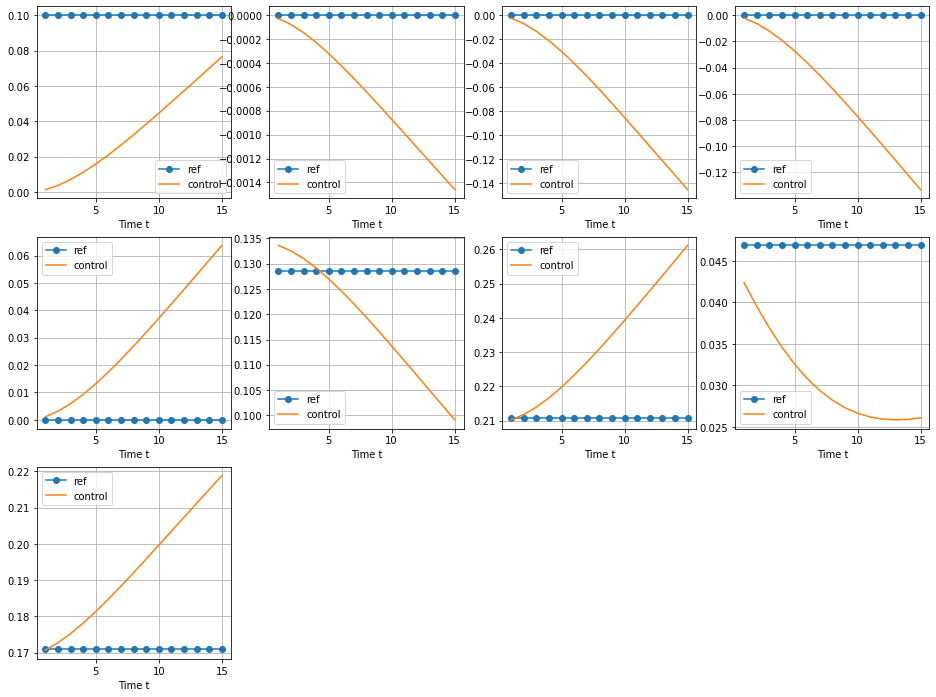

0.06931707810861733 [ 0.03517347 -0.02454339 -0.03176049] [ 0.2846099  -0.02918795]
Point 1 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]


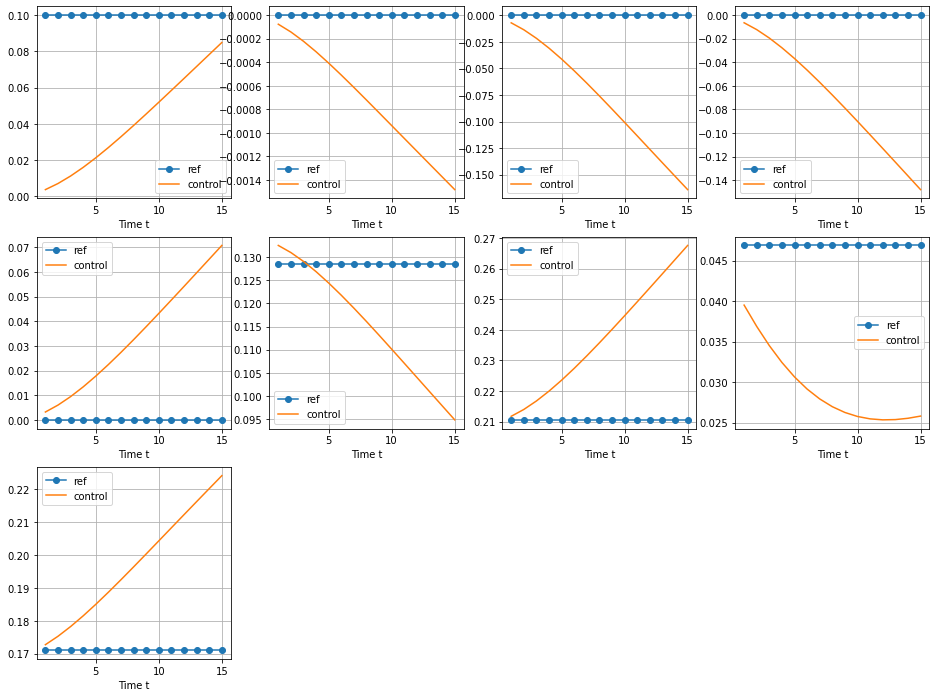

0.027288310014254774 [ 0.09082298 -0.02569891 -0.03448061] [ 0.52972834 -0.0550668 ]


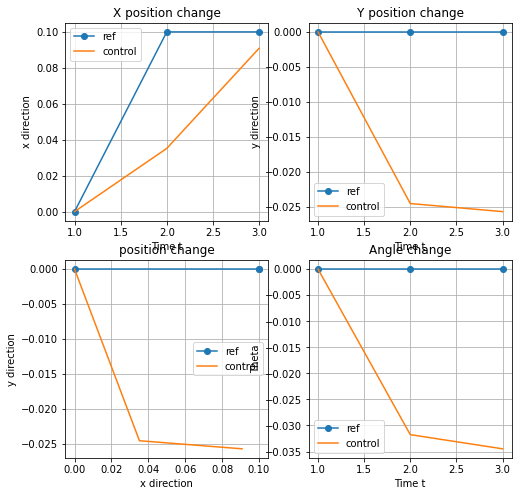

Point 2 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
0.034261690611189895 [ 0.18080815 -0.02838197 -0.0394918 ] [ 0.9049907  -0.10938547]


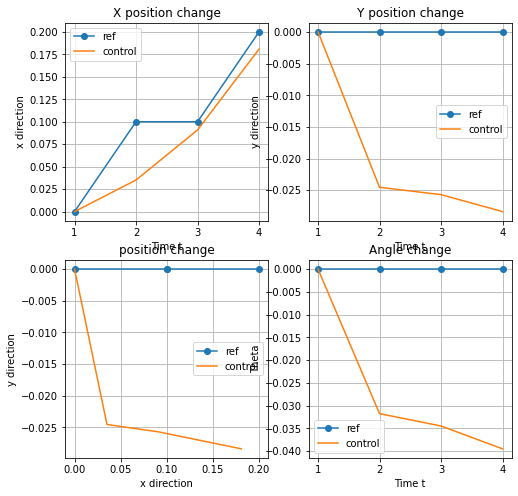

Point 3 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
0.03179494841580786 [ 0.30968274 -0.0302847  -0.05321666] [ 1.26090454 -0.18885065]


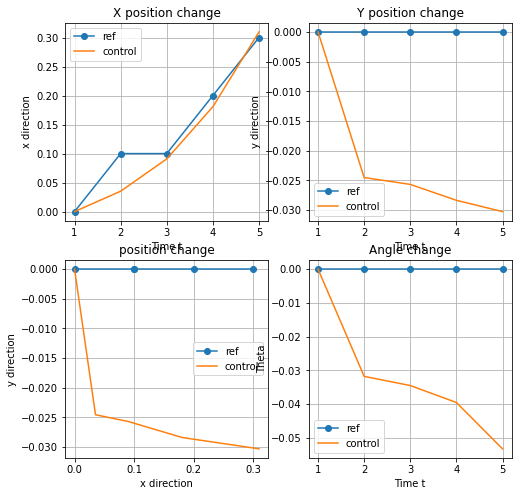

Point 4 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
0.06482397339815664 [ 0.4618097  -0.01953736 -0.07885556] [ 1.49296359 -0.27676687]
Point 4 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
0.2154827717071198 [ 0.61408713 -0.02448519 -0.10518431] [ 1.5        -0.34928538]
Point 4 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
0.3673489060916854 [ 0.76429984 -0.04723183 -0.13863274] [ 1.5        -0.40688782]
Point 4 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
0.5097316423116081 [ 0.90635414 -0.0585818  -0.16701424] [ 1.5        -0.45011998]
Point 4 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
0.6453632643858694 [ 1.04206371 -0.0651762  -0.1889586 ] [ 1.5        -0.47959098]
Point 4 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
0.7830594506739642 [ 1.17638116 -0.10205093 -0.21828141] [ 1.5        -0.49597281]
Point 4 ,Step 7 - MSE error in lifted space,state x, input u:
[0. 0.]
0.921775636

[0. 0.]
4.445782203873585 [-0.74297598 -4.29634558 -0.60773575] [1.27924632 0.14310337]
Point 4 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
4.508233733143917 [-0.76973198 -4.35383721 -0.57398077] [1.20353161 0.14190011]
Point 4 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
4.566129045944266 [-0.79313171 -4.40749035 -0.54217003] [1.12219717 0.13957669]
Point 4 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
4.619361854268086 [-0.81326959 -4.45718306 -0.51242813] [1.03701123 0.13622932]
Point 4 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
4.6697525517646366 [-0.82963828 -4.50495045 -0.4867714 ] [0.94956954 0.13195694]
Point 4 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
4.716828974738548 [-0.8448931  -4.54958424 -0.46330951] [0.86129628 0.12686014]
Point 4 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
4.761747456547195 [-0.86157671 -4.59158611 -0.44216128] [0.77344707 0.12104006]
Point

[0. 0.]
5.359961572709467 [-1.28115251 -5.08949057 -0.43221086] [ 0.05495118 -0.01375564]
Point 4 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
5.376817288775814 [-1.29517322 -5.10260247 -0.42762694] [ 0.05670061 -0.01218019]
Point 4 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
5.393570333912362 [-1.30890731 -5.11568536 -0.42300252] [ 0.05802887 -0.01067798]
Point 4 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
5.4102461540649704 [-1.32240531 -5.12875067 -0.41830548] [ 0.05897183 -0.00925635]
Point 4 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
5.426826888603312 [-1.33566215 -5.14178247 -0.41355754] [ 0.05956581 -0.00792126]
Point 4 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
5.443297961808456 [-1.34867588 -5.15476725 -0.40877871] [ 0.05984713 -0.00667739]
Point 4 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
5.4596479317343585 [-1.36144738 -5.16769375 -0.40398734] [ 0.059851

[0. 0.]
6.100741865748418 [-1.79655992 -5.69158816 -0.13126001] [ 0.04070352 -0.00662649]
Point 4 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
6.113561052590078 [-1.80493218 -5.70209635 -0.12426498] [ 0.04080076 -0.00663846]
Point 4 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
6.126412728757358 [-1.81331754 -5.71263148 -0.11724466] [ 0.04089111 -0.00663863]
Point 4 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
6.139294361619176 [-1.82171285 -5.72319205 -0.11019872] [ 0.04097427 -0.00662803]
Point 4 ,Step 165 - MSE error in lifted space,state x, input u:
[0. 0.]
6.152203543299514 [-1.83011517 -5.73377666 -0.10312699] [ 0.04105007 -0.00660769]
Point 4 ,Step 166 - MSE error in lifted space,state x, input u:
[0. 0.]
6.165138004095588 [-1.83852177 -5.74438395 -0.09602945] [ 0.04111848 -0.00657866]
Point 4 ,Step 167 - MSE error in lifted space,state x, input u:
[0. 0.]
6.178095623200743 [-1.8469301  -5.75501265 -0.08890624] [ 0.04117955

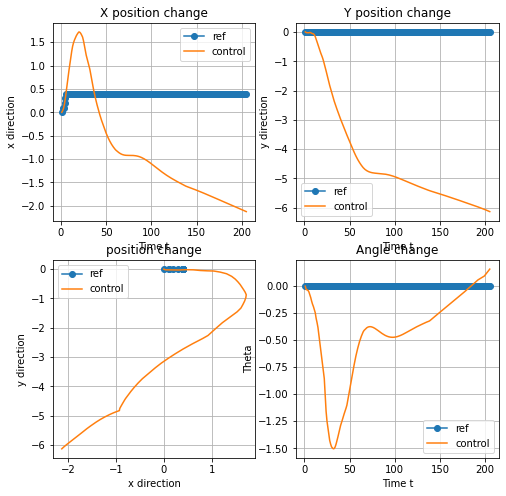

Point 5 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
6.7085265210252745 [-2.15103899 -6.16249303  0.17482092] [ 0.32583774 -0.03440459]
Point 5 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
6.769660537738374 [-2.19230468 -6.21126391  0.19784983] [ 0.57095145 -0.06028734]
Point 5 ,Step 3 - MSE error in lifted space,state x, input u:
[6.78813521e-17 2.11353511e-17]
6.849265613334916 [-2.24722628 -6.27416825  0.22680629] [ 0.77796886 -0.08295795]
Point 5 ,Step 4 - MSE error in lifted space,state x, input u:
[-2.44684761e-17  1.06776763e-19]
6.944712962804769 [-2.31400833 -6.3490468   0.26136233] [ 0.94926518 -0.10251148]
Point 5 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
7.053687369379978 [-2.39123505 -6.43391525  0.30135314] [ 1.08768784 -0.11905484]
Point 5 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
7.173763713872925 [-2.47719011 -6.52680817  0.34623642] [ 1.19509099 -0.13275125]
Point 5 ,Step 7 - MSE error in lifted

[0. 0.]
9.816613257635385 [-4.421541   -8.49378184  1.6301089 ] [-0.01884276  0.01390727]
Point 5 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
9.83012619543167 [-4.42539661 -8.50716458  1.64370648] [-0.01012135  0.01290191]
Point 5 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
9.844424028381512 [-4.42986589 -8.52109774  1.65741914] [-0.00169158  0.01181338]
Point 5 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
9.859491853174966 [-4.43495027 -8.53556357  1.6712481 ] [0.00637285 0.01065963]
Point 5 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
9.875307870214238 [-4.44064438 -8.55054025  1.68519292] [0.01401235 0.00945746]
Point 5 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
9.891844519310474 [-4.44693697 -8.56600272  1.69925177] [0.02118037 0.00822242]
Point 5 ,Step 60 - MSE error in lifted space,state x, input u:
[0. 0.]
9.909069541443372 [-4.4538117  -8.58192338  1.71342167] [0.02784241 0.00696884]
P

[0. 0.]
11.036561115437364 [-5.02321688 -9.55509061  3.02911606] [ 0.04972019 -0.00688389]
Point 5 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
11.05931632776991 [-5.03471534 -9.57472735  3.05766004] [ 0.04979871 -0.00676917]
Point 5 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
11.0820966578321 [-5.04620519 -9.59439807  3.08621422] [ 0.0498902  -0.00666494]
Point 5 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
11.104904546955064 [-5.05768883 -9.61410421  3.11478117] [ 0.04999183 -0.00657115]
Point 5 ,Step 114 - MSE error in lifted space,state x, input u:
[0. 0.]
11.127742237112042 [-5.06916859 -9.63384703  3.14336329] [ 0.050101   -0.00648769]
Point 5 ,Step 115 - MSE error in lifted space,state x, input u:
[0. 0.]
11.151064165397086 [-5.08126701 -9.65379151  3.16710053] [ 0.05021533 -0.00641437]
Point 5 ,Step 116 - MSE error in lifted space,state x, input u:
[0. 0.]
11.174745185468057 [-5.09381192 -9.6738926   3.18736053] [ 0.0503

[0. 0.]
12.382492933944865 [ -5.73170794 -10.700091     4.26069128] [ 0.05151896 -0.00690449]
Point 5 ,Step 165 - MSE error in lifted space,state x, input u:
[0. 0.]
12.408980595670789 [ -5.74557685 -10.72266614   4.28469858] [ 0.05151547 -0.00690137]
Point 5 ,Step 166 - MSE error in lifted space,state x, input u:
[0. 0.]
12.435510313385047 [ -5.75945855 -10.74528247   4.3087337 ] [ 0.05151265 -0.00689759]
Point 5 ,Step 167 - MSE error in lifted space,state x, input u:
[0. 0.]
12.462082117438685 [ -5.77335298 -10.76794006   4.33279651] [ 0.05151047 -0.00689323]
Point 5 ,Step 168 - MSE error in lifted space,state x, input u:
[0. 0.]
12.488696046638262 [ -5.7872601  -10.79063897   4.35688693] [ 0.05150887 -0.00688839]
Point 5 ,Step 169 - MSE error in lifted space,state x, input u:
[0. 0.]
12.51535214784965 [ -5.80117989 -10.81337928   4.38100486] [ 0.05150781 -0.00688314]
Point 5 ,Step 170 - MSE error in lifted space,state x, input u:
[0. 0.]
12.541997763126815 [ -5.81508515 -10.83611589

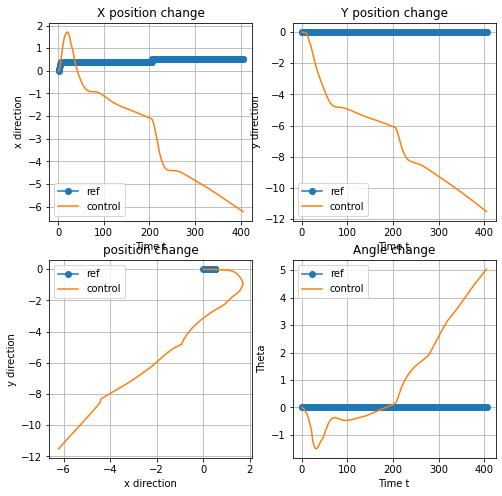

Point 6 ,Step 1 - MSE error in lifted space,state x, input u:
[ 1.97001238e-17 -1.07292426e-17]
13.462191010057708 [ -6.25617759 -11.54408224   5.10076772] [ 0.02299581 -0.1873552 ]
Point 6 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
13.519140947523162 [ -6.30528385 -11.5814076    5.20374179] [-0.00170813 -0.32742975]
Point 6 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
13.588664218198494 [ -6.36842406 -11.62503928   5.34138115] [-0.02273328 -0.42650934]
Point 6 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
13.667511227958723 [ -6.44176998 -11.67338918   5.50560057] [-0.04026745 -0.48415971]
Point 6 ,Step 5 - MSE error in lifted space,state x, input u:
[6.53568777e-19 7.61975699e-04]
13.742274275418586 [ -6.51612235 -11.71626546   5.65026197] [-0.05452073 -0.49999138]
Point 6 ,Step 6 - MSE error in lifted space,state x, input u:
[1.68846535e-18 8.95136067e-04]
13.815802485464655 [ -6.59156248 -11.75690263   5.78937788] [-0.0657198  -0.

[0. 0.]
17.587271823650045 [-10.38609069 -13.71322409   5.85701241] [ 0.05586172 -0.5       ]
Point 6 ,Step 48 - MSE error in lifted space,state x, input u:
[0. 0.]
17.673201995102 [-10.46266597 -13.76225175   5.75583674] [ 0.05522322 -0.5       ]
Point 6 ,Step 49 - MSE error in lifted space,state x, input u:
[0. 0.]
17.759234678330134 [-10.53930372 -13.8112972    5.65453654] [ 0.05451405 -0.5       ]
Point 6 ,Step 50 - MSE error in lifted space,state x, input u:
[0. 0.]
17.84536606483842 [-10.61600195 -13.86035783   5.55310944] [ 0.05375839 -0.5       ]
Point 6 ,Step 51 - MSE error in lifted space,state x, input u:
[0. 0.]
17.9315942361289 [-10.69275971 -13.9094326    5.4515545 ] [ 0.05298364 -0.5       ]
Point 6 ,Step 52 - MSE error in lifted space,state x, input u:
[0. 0.]
18.01776317970095 [-10.76942824 -13.95844149   5.35087201] [ 0.05221788 -0.49783997]
Point 6 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
18.100494419985896 [-10.84482426 -14.00400159   5.3166094

[0. 0.]
20.096214226217587 [-12.24628664 -15.43673078   7.4531883 ] [0.05530173 0.06663394]
Point 6 ,Step 101 - MSE error in lifted space,state x, input u:
[0. 0.]
20.122347038755922 [-12.25478106 -15.46356034   7.46302376] [0.05517819 0.06163069]
Point 6 ,Step 102 - MSE error in lifted space,state x, input u:
[0. 0.]
20.148989774527557 [-12.26385222 -15.49056976   7.4738417 ] [0.0550461  0.05663577]
Point 6 ,Step 103 - MSE error in lifted space,state x, input u:
[0. 0.]
20.176147659727686 [-12.2735076  -15.51776034   7.48564974] [0.05490743 0.05169272]
Point 6 ,Step 104 - MSE error in lifted space,state x, input u:
[0. 0.]
20.2038213368539 [-12.28374899 -15.5451321    7.4984463 ] [0.05476404 0.04684078]
Point 6 ,Step 105 - MSE error in lifted space,state x, input u:
[0. 0.]
20.23200726993853 [-12.29457292 -15.57268394   7.51222144] [0.05461772 0.04211495]
Point 6 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
20.260698150029764 [-12.30597118 -15.60041374   7.52695766]

[0. 0.]
21.85192203296234 [-13.10295538 -17.00164032   9.67352341] [0.05334496 0.01445849]
Point 6 ,Step 154 - MSE error in lifted space,state x, input u:
[0. 0.]
21.88604443304494 [-13.11958156 -17.03201503   9.73589074] [0.05336086 0.01480267]
Point 6 ,Step 155 - MSE error in lifted space,state x, input u:
[0. 0.]
21.920177676650678 [-13.13617388 -17.06242848   9.79843654] [0.05337485 0.01510033]
Point 6 ,Step 156 - MSE error in lifted space,state x, input u:
[0. 0.]
21.95432688099576 [-13.15273786 -17.09288277   9.86114512] [0.05338697 0.01535292]
Point 6 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
21.98849705117722 [-13.16927889 -17.12337996   9.92400168] [0.05339726 0.01556215]
Point 6 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
22.022693046822802 [-13.18580224 -17.15392205   9.98699243] [0.0534058  0.01572998]
Point 6 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
22.056919552973437 [-13.20231301 -17.18451094  10.05010454] 

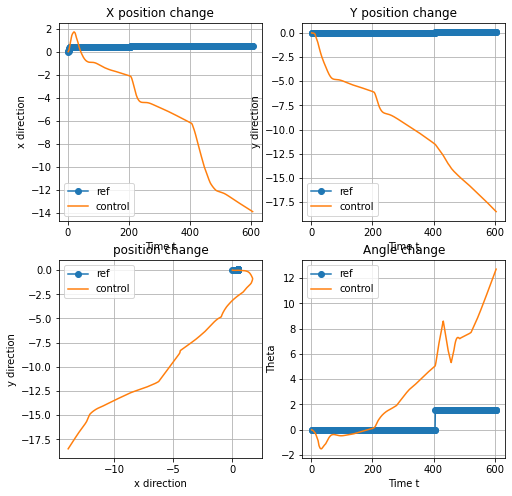

Point 7 ,Step 1 - MSE error in lifted space,state x, input u:
[9.42302404e-18 5.69039237e-18]
23.639784132370576 [-13.92708144 -18.52695156  12.67060193] [ 0.02470195 -0.17162136]
Point 7 ,Step 2 - MSE error in lifted space,state x, input u:
[6.03661399e-18 3.28779976e-18]
23.69911643280587 [-13.96898108 -18.56956862  12.57835375] [-3.61023091e-05 -3.15292043e-01]
Point 7 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
23.766838127943494 [-14.02032517 -18.61549233  12.44429184] [-0.02109442 -0.41816159]
Point 7 ,Step 4 - MSE error in lifted space,state x, input u:
[1.88154255e-18 3.78417441e-04]
23.8408279723369 [-14.07908626 -18.66359781  12.28965692] [-0.03866052 -0.47984167]
Point 7 ,Step 5 - MSE error in lifted space,state x, input u:
[1.02457886e-18 7.26514853e-04]
23.91810755865462 [-14.14224258 -18.71244567  12.13477914] [-0.05294425 -0.49998896]
Point 7 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
23.99689885711222 [-14.20790702 -18.76124009  11.9

[0. 0.]
27.098188340577902 [-16.87133602 -20.59780028  19.22144662] [ 0.05671022 -0.5       ]
Point 7 ,Step 49 - MSE error in lifted space,state x, input u:
[0. 0.]
27.173901939878665 [-16.93688302 -20.64169036  19.48303941] [ 0.05603379 -0.5       ]
Point 7 ,Step 50 - MSE error in lifted space,state x, input u:
[0. 0.]
27.249844944313125 [-17.00206753 -20.68616005  19.74084957] [ 0.05533586 -0.49682352]
Point 7 ,Step 51 - MSE error in lifted space,state x, input u:
[0. 0.]
27.32589179440914 [-17.06718505 -20.7307996   19.99325426] [ 0.05463652 -0.48923073]
Point 7 ,Step 52 - MSE error in lifted space,state x, input u:
[0. 0.]
27.401976454295106 [-17.13209611 -20.77564064  20.23767578] [ 0.05395344 -0.47767734]
Point 7 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
27.47800086138133 [-17.19663583 -20.82069484  20.47193646] [ 0.05330177 -0.46261407]
Point 7 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
27.553845387565254 [-17.26062514 -20.86595809  20.69

[0. 0.]
30.172287991855395 [-18.87364718 -22.93068866  20.32047181] [0.05652041 0.0669142 ]
Point 7 ,Step 103 - MSE error in lifted space,state x, input u:
[0. 0.]
30.219038020872084 [-18.89703098 -22.97208337  20.29659101] [0.05637633 0.06203608]
Point 7 ,Step 104 - MSE error in lifted space,state x, input u:
[0. 0.]
30.265707235377178 [-18.92015272 -23.01358875  20.27766275] [0.0562306  0.05732681]
Point 7 ,Step 105 - MSE error in lifted space,state x, input u:
[0. 0.]
30.312672818064957 [-18.94356121 -23.05523728  20.2609432 ] [0.0560848  0.05281329]
Point 7 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
30.35998662932019 [-18.96733245 -23.09703319  20.24596236] [0.05594038 0.04851832]
Point 7 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
30.40764384682288 [-18.99146035 -23.13897551  20.23262806] [0.05579866 0.04446075]
Point 7 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
30.455637728115388 [-19.01593641 -23.18106275  20.22084167

[0. 0.]
33.01355986819281 [-20.41716948 -25.34147913  19.34649173] [0.05517683 0.03562541]
Point 7 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
33.071241392294866 [-20.44983506 -25.38928327  19.29810411] [0.05518374 0.03575108]
Point 7 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
33.12899499596306 [-20.48251372 -25.43716886  19.2496424 ] [0.055189   0.03583888]
Point 7 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
33.18249347597256 [-20.50965798 -25.48408349  19.23139018] [0.05519272 0.03589136]
Point 7 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
33.2306463914395 [-20.52986562 -25.52976121  19.25102618] [0.05519499 0.03591116]
Point 7 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
33.27887642083802 [-20.55008661 -25.57552074  19.27068476] [0.05519592 0.03590097]
Point 7 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
33.3274119542312 [-20.57051551 -25.62149809  19.29117063] [0.0

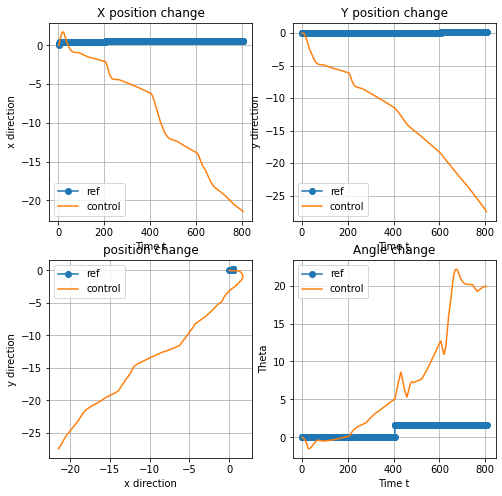

Point 8 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
35.44708075020769 [-21.47465576 -27.51384616  19.93425593] [ 0.02643424 -0.15526103]
Point 8 ,Step 2 - MSE error in lifted space,state x, input u:
[2.36031415e-18 1.82063591e-17]
35.50766325981818 [-21.51449832 -27.5595767   20.0322279 ] [ 0.00166121 -0.30267261]
Point 8 ,Step 3 - MSE error in lifted space,state x, input u:
[3.29876739e-18 1.30166223e-17]
35.57197387238709 [-21.56130514 -27.60455412  20.16213874] [-0.01943133 -0.40948182]
Point 8 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
35.63996902516677 [-21.61406557 -27.64951692  20.31303803] [-0.03703064 -0.47535252]
Point 8 ,Step 5 - MSE error in lifted space,state x, input u:
[2.12144544e-18 8.92328582e-04]
35.71108688246975 [-21.67119326 -27.69499805  20.47336985] [-0.05134621 -0.49997495]
Point 8 ,Step 6 - MSE error in lifted space,state x, input u:
[3.69240598e-19 2.52433994e-04]
35.78750310016287 [-21.73317183 -27.74338511  20.64973732] 

[0. 0.]
39.93148765114876 [-24.98814966 -30.43886681  29.90873123] [ 0.05586116 -0.44151247]
Point 8 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
40.025929417915734 [-25.05956202 -30.50233457  30.08848916] [ 0.05530004 -0.4198538 ]
Point 8 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
40.11977521773407 [-25.13018752 -30.56567432  30.25794506] [ 0.05478308 -0.39591108]
Point 8 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
40.21288092114537 [-25.19984866 -30.6288469   30.41631126] [ 0.05431919 -0.37009747]
Point 8 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
40.30511053513666 [-25.26837751 -30.69181595  30.56296933] [ 0.05391517 -0.34280637]
Point 8 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
40.39633907438817 [-25.33561922 -30.75454862  30.69746038] [ 0.05357579 -0.3144097 ]
Point 8 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
40.48645461434455 [-25.40143465 -30.81701609  30.819474

[0. 0.]
43.69996338511071 [-27.13136474 -33.55549413  29.91780272] [0.05757197 0.06445976]
Point 8 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
43.76673642639738 [-27.16383448 -33.61518066  29.89851543] [0.05743512 0.06052623]
Point 8 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
43.83388048825802 [-27.1966663  -33.67504606  29.88072424] [0.05730281 0.05686703]
Point 8 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
43.90138535212027 [-27.22984722 -33.73508791  29.86431777] [0.05717603 0.05349049]
Point 8 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
43.96923953221458 [-27.26336267 -33.79530346  29.84918224] [0.05705558 0.0504017 ]
Point 8 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
44.037430491618224 [-27.29719673 -33.85568969  29.83520272] [0.05694219 0.04760274]
Point 8 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
44.105944848349395 [-27.33133241 -33.91624332  29.82226422] [

[0. 0.]
47.58206581151532 [-28.98856172 -37.04270631  29.80474537] [0.05696661 0.05577658]
Point 8 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
47.655912350179705 [-29.02125618 -37.11097988  29.80480532] [0.05696636 0.05573645]
Point 8 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
47.72988205782418 [-29.05398659 -37.17937456  29.80490265] [0.05696495 0.055671  ]
Point 8 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
47.803977268691 [-29.08675589 -37.247891    29.80504551] [0.05696249 0.05558305]
Point 8 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
47.87820015793851 [-29.11956679 -37.31652979  29.80524118] [0.05695909 0.05547535]
Point 8 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
47.95255273905345 [-29.15242174 -37.38529155  29.80549601] [0.05695487 0.05535059]
Point 8 ,Step 165 - MSE error in lifted space,state x, input u:
[0. 0.]
48.02703686292754 [-29.18532298 -37.45417684  29.80581553] [0.0

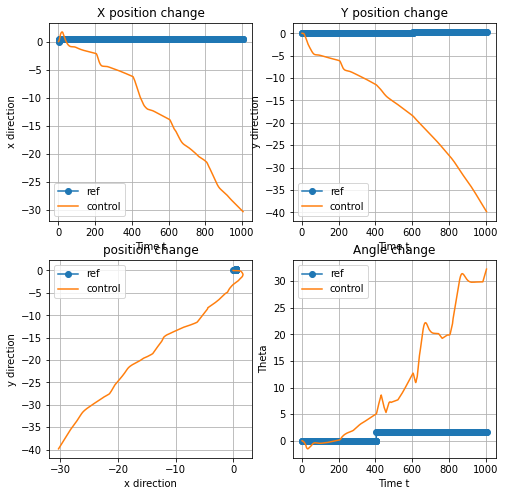

Point 9 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
50.76800557496266 [-30.37855076 -39.89771077  32.27363106] [ 0.02816913 -0.13831815]
Point 9 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
50.856440667637024 [-30.42776123 -39.97141492  32.2776633 ] [ 0.00336108 -0.28962511]
Point 9 ,Step 3 - MSE error in lifted space,state x, input u:
[8.77801213e-19 1.82875960e-17]
50.95189978783293 [-30.48513007 -40.04771695  32.24977168] [-0.01776578 -0.40051765]
Point 9 ,Step 4 - MSE error in lifted space,state x, input u:
[3.32312841e-19 1.88087367e-04]
51.05300531633145 [-30.54938957 -40.12585297  32.20511613] [-0.03539836 -0.47071163]
Point 9 ,Step 5 - MSE error in lifted space,state x, input u:
[4.57353962e-18 8.42924799e-04]
51.15791791006671 [-30.6186771  -40.20493197  32.15786217] [-0.04974587 -0.49996867]
Point 9 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
51.26498006524788 [-30.69126385 -40.28418907  32.11726541] [-0.06103423 -0.5      

[0. 0.]
56.79188401635832 [-34.78552855 -44.09999511  39.00052935] [ 0.05744844 -0.36820628]
Point 9 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
56.90868980053834 [-34.86433553 -44.18657586  39.15588082] [ 0.05701548 -0.34008101]
Point 9 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
57.024485039601785 [-34.94153828 -44.273138    39.30224631] [ 0.05663179 -0.31077224]
Point 9 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
57.139177600135724 [-35.01702793 -44.35965085  39.43908553] [ 0.05630309 -0.28064393]
Point 9 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
57.252690326739724 [-35.09071644 -44.44608626  39.56596718] [ 0.05603322 -0.25003532]
Point 9 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
57.36496129595544 [-35.16253638 -44.53241907  39.68256774] [ 0.05582431 -0.21926005]
Point 9 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
57.47594373220491 [-35.23244049 -44.61862731  39.7886

[0. 0.]
61.84702286788619 [-37.19998245 -48.62821189  39.347992  ] [0.05896009 0.07362578]
Point 9 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
61.93498490391259 [-37.23980168 -48.70855042  39.49808206] [0.05883957 0.07039664]
Point 9 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
62.02341502303308 [-37.28001303 -48.78917184  39.64778919] [0.05872571 0.06746759]
Point 9 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
62.11228869901576 [-37.32058854 -48.87006687  39.7971932 ] [0.05861913 0.06483821]
Point 9 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
62.20158106972205 [-37.36149999 -48.95122598  39.946372  ] [0.05852033 0.06250546]
Point 9 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
62.29126718986966 [-37.4027192  -49.03263947  40.09540112] [0.0584297  0.06046397]
Point 9 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
62.3813222621395 [-37.44421824 -49.11429763  40.24435326] [0.0

[0. 0.]
66.78212923299812 [-39.41665784 -53.13982828  47.68469317] [0.05873346 0.07546249]
Point 9 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
66.86570468512438 [-39.45142433 -53.21815138  47.83479081] [0.05873016 0.0753529 ]
Point 9 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
66.94944655907244 [-39.4862557  -53.29662698  47.98511565] [0.05872599 0.07522536]
Point 9 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
67.03335805669545 [-39.52115475 -53.37525699  48.13566674] [0.05872107 0.07508257]
Point 9 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
67.11744201692919 [-39.55612389 -53.45404313  48.28644362] [0.05871551 0.07492716]
Point 9 ,Step 165 - MSE error in lifted space,state x, input u:
[0. 0.]
67.20170092584549 [-39.59116522 -53.53298693  48.4374463 ] [0.05870941 0.07476159]
Point 9 ,Step 166 - MSE error in lifted space,state x, input u:
[0. 0.]
67.28613692894956 [-39.6262805  -53.61208972  48.58867525] [0.

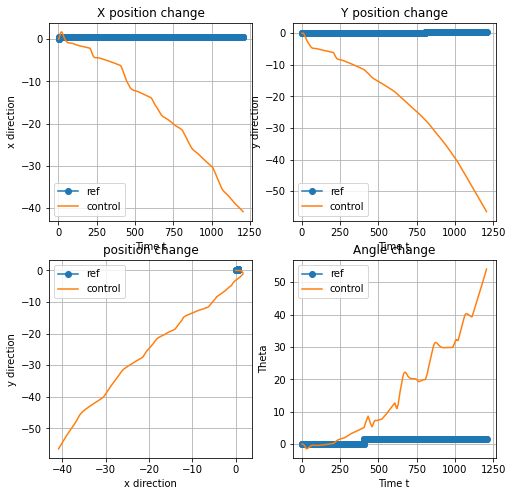

Point 10 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
70.52237038833897 [-40.94430768 -56.55939086  54.13969192] [ 0.02990446 -0.12136546]
Point 10 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
70.64552060226657 [-41.01596014 -56.65955419  54.20435576] [ 0.00506331 -0.27569326]
Point 10 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
70.78077511077544 [-41.10041947 -56.76537545  54.24006229] [-0.01609778 -0.39094905]
Point 10 ,Step 4 - MSE error in lifted space,state x, input u:
[1.08018288e-18 9.98209037e-05]
70.92527929079472 [-41.19431761 -56.8757712   54.26032742] [-0.03376363 -0.46577694]
Point 10 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
71.0756464582562 [-41.29386679 -56.98930525  54.27765318] [-0.04814312 -0.5       ]
Point 10 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
71.22862101604152 [-41.39556545 -57.10449676  54.30171028] [-0.05946189 -0.5       ]
Point 10 ,Step 7 - MSE error in lifted sp

[0. 0.]
79.37191069553003 [-46.80722651 -63.23324507  57.21810204] [ 0.05971593 -0.31144576]
Point 10 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
79.53200016797443 [-46.90487101 -63.36013823  57.34247076] [ 0.05935715 -0.28044132]
Point 10 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
79.68835905958227 [-46.99866672 -63.48524228  57.47452832] [ 0.05904221 -0.24885997]
Point 10 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
79.84119762651754 [-47.08859307 -63.6088344   57.61505526] [ 0.05877606 -0.21703251]
Point 10 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
79.99009039386027 [-47.17452097 -63.73048039  57.76287224] [ 0.05856187 -0.18526283]
Point 10 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
80.13501453114672 [-47.25643921 -63.85015981  57.91776287] [ 0.05840126 -0.15382757]
Point 10 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
80.2759839399235 [-47.33437179 -63.96787163  58.07

[0. 0.]
85.38351705220269 [-49.34737412 -68.82232164  68.12249711] [0.0604082  0.08494704]
Point 10 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
85.49870267508935 [-49.39487583 -68.93003331  68.3272771 ] [0.06030814 0.08246252]
Point 10 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
85.61448917212276 [-49.44280723 -69.03816766  68.53217911] [0.06021593 0.08028084]
Point 10 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
85.73083809961965 [-49.49113013 -69.14670494  68.73726596] [0.0601319  0.07839472]
Point 10 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
85.84771157981494 [-49.53980699 -69.25562558  68.94259706] [0.06005625 0.0767949 ]
Point 10 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
85.96507259054499 [-49.58880121 -69.36491035  69.14822821] [0.05998909 0.0754704 ]
Point 10 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
86.08288522175435 [-49.63807739 -69.47454054  69.3542114

[0. 0.]
91.64851538152892 [-51.83555218 -74.73589801  78.56628254] [0.06049275 0.09497535]
Point 10 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
91.75779133949496 [-51.87543819 -74.84126191  78.71601882] [0.06048725 0.09481737]
Point 10 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
91.86732269462556 [-51.9154251  -74.94685673  78.86602213] [0.06048117 0.0946483 ]
Point 10 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
91.97711218678407 [-51.95551495 -75.05268438  79.01629569] [0.06047461 0.09447062]
Point 10 ,Step 165 - MSE error in lifted space,state x, input u:
[0. 0.]
92.08716212173833 [-51.99570943 -75.15874648  79.16684265] [0.06046768 0.09428665]
Point 10 ,Step 166 - MSE error in lifted space,state x, input u:
[0. 0.]
92.19735460632042 [-52.03588174 -75.26498747  79.31806708] [0.06046047 0.09409859]
Point 10 ,Step 167 - MSE error in lifted space,state x, input u:
[0. 0.]
92.30528419128308 [-52.07345841 -75.37026401  79.4780316

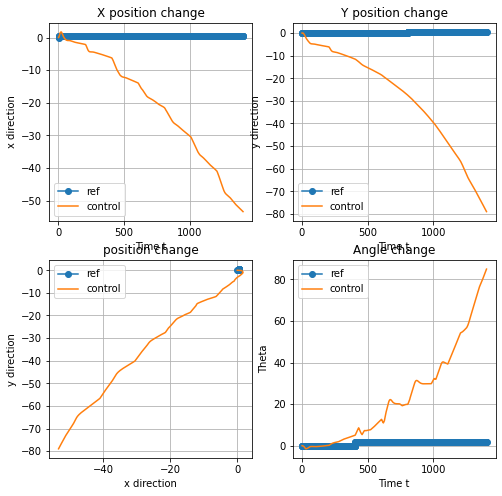

Point 11 ,Step 1 - MSE error in lifted space,state x, input u:
[-2.65904153e-18  1.85706844e-17]
95.96741911547281 [-53.37681946 -79.05215009  85.08637619] [-0.43029677  0.15193546]
Point 11 ,Step 2 - MSE error in lifted space,state x, input u:
[3.18387210e-17 4.09390516e-18]
95.99460804218312 [-53.35847057 -79.09731974  85.23406744] [-0.82545191  0.20600277]
Point 11 ,Step 3 - MSE error in lifted space,state x, input u:
[-7.03188685e-17  3.75451557e-17]
95.98979376905551 [-53.31842297 -79.11849801  85.37326485] [-1.12731826  0.25380117]
Point 11 ,Step 4 - MSE error in lifted space,state x, input u:
[1.20547061e-16 4.31256664e-18]
95.96100699024436 [-53.25380829 -79.12728477  85.26433519] [-1.33841248  0.29546197]
Point 11 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
95.91603359261354 [-53.17300569 -79.12740208  85.01655846] [-1.46157859  0.33115864]
Point 11 ,Step 6 - MSE error in lifted space,state x, input u:
[1.53306178e-03 3.52243666e-18]
95.86247879321303 [-53.08

[0. 0.]
86.94924010310537 [-44.402458   -74.0778828   53.09185467] [0.21261041 0.03699299]
Point 11 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
87.11850733118723 [-44.47035491 -74.23452777  53.19000088] [0.21320368 0.04008565]
Point 11 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
87.28273115967215 [-44.5345308  -74.38751569  53.27626154] [0.21145217 0.0434218 ]
Point 11 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
87.44103348116747 [-44.59477392 -74.53594879  53.3505281 ] [0.20767513 0.04694645]
Point 11 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
87.59358468427116 [-44.65063113 -74.68029555  53.41062248] [0.20217799 0.05060791]
Point 11 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
87.74011186250168 [-44.70191423 -74.82034881  53.45596558] [0.19525012 0.05435803]
Point 11 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
87.88044006474264 [-44.74850511 -74.95597348  53.48619674] [0.

[0. 0.]
91.76053504899518 [-44.80998642 -79.40672636  47.94192004] [0.03831268 0.09505927]
Point 11 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
91.86065304998131 [-44.82118999 -79.51535973  47.85181066] [0.03895387 0.09465807]
Point 11 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
91.96200974572416 [-44.83317454 -79.62495112  47.76405636] [0.03952413 0.09429355]
Point 11 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
92.06453878005163 [-44.84589085 -79.73545252  47.67849821] [0.04002494 0.0939657 ]
Point 11 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
92.16817476170301 [-44.85929036 -79.84681657  47.59497915] [0.04045852 0.09367417]
Point 11 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
92.27285378459923 [-44.87332559 -79.95899701  47.51334523] [0.04082768 0.09341834]
Point 11 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
92.37851388315559 [-44.88795044 -80.07194898  47.4334467

[0. 0.]
97.94186830509965 [-46.39242166 -85.59545474  44.59790344] [0.0396001  0.09510023]
Point 11 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
98.07190222853647 [-46.43844419 -85.71841938  44.5531487 ] [0.03961504 0.09509043]
Point 11 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
98.20252552160768 [-46.48465998 -85.84194583  44.509084  ] [0.03963001 0.0950782 ]
Point 11 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
98.33374086305496 [-46.53107002 -85.96603653  44.46571441] [0.03964481 0.09506384]
Point 11 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
98.4655504248928 [-46.57767512 -86.09069347  44.42304386] [0.03965926 0.09504769]
Point 11 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
98.59795589531655 [-46.62447593 -86.21591818  44.38107514] [0.0396732  0.09503003]
Point 11 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
98.73095850388806 [-46.67147292 -86.34171175  44.33980997

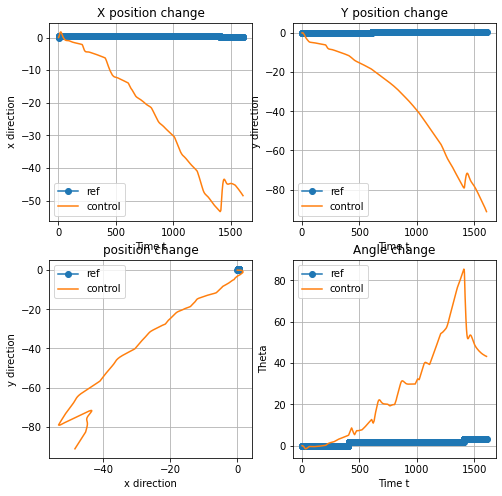

Point 12 ,Step 1 - MSE error in lifted space,state x, input u:
[ 1.06923160e-16 -1.86825587e-18]
103.81089380620224 [-48.48699387 -91.23879059  42.89047207] [-0.44832333  0.15509719]
Point 12 ,Step 2 - MSE error in lifted space,state x, input u:
[-7.10043768e-18  8.16574818e-18]
103.70424377405084 [-48.43969205 -91.14315835  42.36776119] [-0.8406815   0.20918102]
Point 12 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
103.49692644483295 [-48.35374581 -90.95407755  41.64518891] [-1.13943149  0.25699616]
Point 12 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
103.20755756732284 [-48.23665108 -90.6886402   40.75553336] [-1.34700776  0.29867393]
Point 12 ,Step 5 - MSE error in lifted space,state x, input u:
[1.49471523e-03 1.49629031e-17]
102.85427890091213 [-48.09566805 -90.36352552  39.73104359] [-1.46622532  0.33438846]
Point 12 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
102.47826124820655 [-47.95079421 -90.01472369  38.61717921] [-1.5   

[0. 0.]
103.42094639782424 [-48.18342136 -90.95820562  24.24682374] [0.18927982 0.04565732]
Point 12 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
103.6581205628722 [-48.25169279 -91.19034716  24.41393961] [0.18625173 0.04923087]
Point 12 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
103.89245786631746 [-48.31943617 -91.41953548  24.57282214] [0.18141977 0.05294182]
Point 12 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
104.12377472507602 [-48.38659966 -91.64559195  24.72311914] [0.17507516 0.05674151]
Point 12 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
104.35194306582154 [-48.4531452  -91.86839348  24.86460225] [0.16749215 0.06058495]
Point 12 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
104.57688601201487 [-48.51904742 -92.08786808  24.99715704] [0.15892655 0.06443095]
Point 12 ,Step 60 - MSE error in lifted space,state x, input u:
[0. 0.]
104.7985734524324 [-48.58429259 -92.3039905   25.12077296

[0. 0.]
114.32539971824217 [ -51.57927995 -101.47817925   27.12985653] [0.01922908 0.09664262]
Point 12 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
114.53945009772166 [ -51.64920761 -101.6827047    27.17543815] [0.01968054 0.09634844]
Point 12 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
114.75416598354315 [ -51.71935953 -101.88785371   27.22164087] [0.02006745 0.09609056]
Point 12 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
114.96950980103809 [ -51.78972377 -102.0935902    27.26838206] [0.02039291 0.09586805]
Point 12 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
115.18544542366723 [ -51.86028887 -102.29987946   27.31558201] [0.02066043 0.09567974]
Point 12 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
115.40193838888251 [ -51.93104393 -102.50668838   27.36316442] [0.02087383 0.09552424]
Point 12 ,Step 114 - MSE error in lifted space,state x, input u:
[0. 0.]
115.61895607668427 [ -52.0019786

[0. 0.]
126.03355391506551 [ -55.42765008 -112.64210882   29.56950317] [0.0190128  0.09780202]
Point 12 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
126.27229367512827 [ -55.50702987 -112.86908917   29.61899778] [0.01902741 0.09778717]
Point 12 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
126.51150415886579 [ -55.58657931 -113.09650333   29.66859127] [0.01904174 0.0977705 ]
Point 12 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
126.75118786319452 [ -55.66629926 -113.32435368   29.71828754] [0.01905563 0.09775234]
Point 12 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
126.99134696935977 [ -55.74619047 -113.5526423    29.76808982] [0.01906895 0.09773297]
Point 12 ,Step 165 - MSE error in lifted space,state x, input u:
[0. 0.]
127.23198336166544 [ -55.82625361 -113.78137095   29.81800068] [0.01908159 0.09771268]
Point 12 ,Step 166 - MSE error in lifted space,state x, input u:
[0. 0.]
127.47309864713853 [ -55.9064892

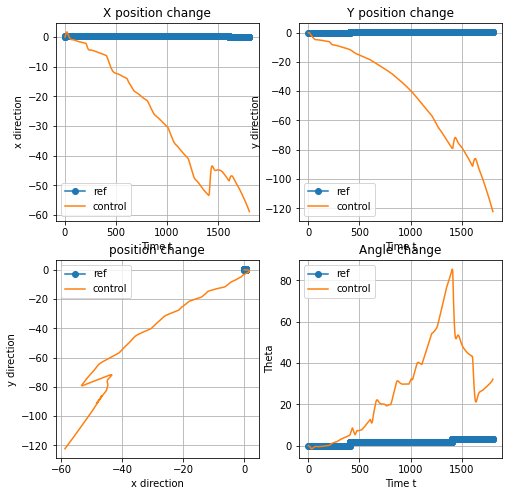

Point 13 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
136.2332441046785 [ -58.87673558 -122.40155472   31.94988839] [-0.46637991  0.15785912]
Point 13 ,Step 2 - MSE error in lifted space,state x, input u:
[2.90054553e-18 7.78267038e-18]
136.24749475919276 [ -58.86874431 -122.42117198   31.55173011] [-0.85589156  0.21199016]
Point 13 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
136.16137546353687 [ -58.82207257 -122.34802953   30.95973357] [-1.15151328  0.25985288]
Point 13 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
136.02783996213546 [ -58.75930688 -122.23002469   30.28041206] [-1.35557311  0.30157879]
Point 13 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
135.92039933860056 [ -58.71192333 -122.13359001   29.66520094] [-1.47074183  0.33734094]
Point 13 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
135.78174369500908 [ -58.65410267 -122.00754663   28.98249454] [-1.5         0.36734939]
Point 13 ,Step 7 

[0. 0.]
140.93335809785916 [ -60.0490587  -127.04733155   18.61561661] [0.16446624 0.04125627]
Point 13 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
141.269781702657 [ -60.14653535 -127.37323729   18.81723647] [0.16693787 0.04443849]
Point 13 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
141.60406747312956 [ -60.24369532 -127.69691041   19.01215115] [0.16689383 0.04786802]
Point 13 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
141.93589893664327 [ -60.34044599 -128.01804571   19.19976191] [0.16465263 0.05148873]
Point 13 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
142.26502383579253 [ -60.43671176 -128.33640099   19.37960354] [0.16052127 0.05524785]
Point 13 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
142.59643357642838 [ -60.53634394 -128.6556859    19.55761076] [0.15479273 0.05909618]
Point 13 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
142.9405614379189 [ -60.64727446 -128.98

[0. 0.]
157.65877884653185 [ -65.45601075 -142.97432664   24.1685372 ] [-0.0033919   0.10044071]
Point 13 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
157.98382213156074 [ -65.56222464 -143.28311862   24.26394391] [-0.00271727  0.1000298 ]
Point 13 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
158.30981512787835 [ -65.66878325 -143.59279034   24.36019093] [-0.00211202  0.09965696]
Point 13 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
158.63671327335462 [ -65.77567151 -143.90329972   24.45718505] [-0.00157531  0.09932214]
Point 13 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
158.96447263797475 [ -65.8828746  -144.21460524   24.5548342 ] [-0.00110552  0.09902496]
Point 13 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
159.29305030344818 [ -65.99037808 -144.52666635   24.65304818] [-0.00070035  0.09876471]
Point 13 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
159.62240469561402 [

[0. 0.]
176.00127687579302 [ -71.62053277 -160.3143739    31.43595641] [-0.00165993  0.10056252]
Point 13 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
176.37987227092896 [ -71.74919826 -160.67149789   31.58760442] [-0.00164689  0.10055782]
Point 13 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
176.759072596492 [ -71.87809896 -161.02917463   31.73927418] [-0.00163311  0.10054993]
Point 13 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
177.1388842462584 [ -72.00723718 -161.38741011   31.89097724] [-0.00161889  0.10053921]
Point 13 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
177.5193130412356 [ -72.13661503 -161.74620981   32.04272391] [-0.00160446  0.10052601]
Point 13 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
177.90036424796838 [ -72.26623441 -162.10557866   32.19452332] [-0.00159005  0.10051067]
Point 13 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
178.2820426001196 [ -72.

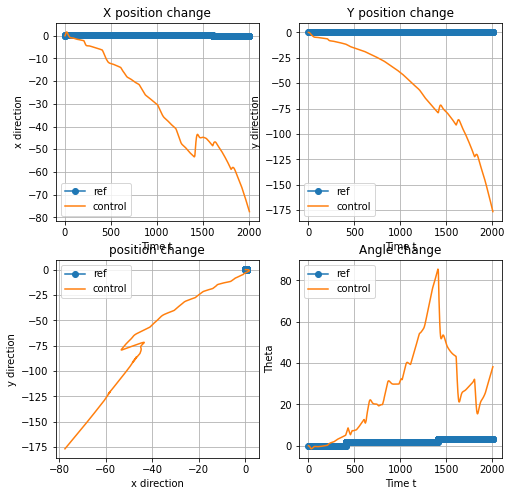

Point 14 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
193.45266017184193 [ -77.59971522 -176.83777306   38.05173188] [-0.48442784  0.16062108]
Point 14 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
193.59825731061193 [ -77.63519742 -176.98113272   37.71047097] [-0.8711812   0.21479761]
Point 14 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
193.64300034478578 [ -77.63118078 -177.03168749   37.17277774] [-1.16368833  0.26270755]
Point 14 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
193.60581319452663 [ -77.59553191 -177.00665241   36.47183096] [-1.36422349  0.30448129]
Point 14 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
193.50515792344174 [ -77.53586584 -176.9228485    35.64009028] [-1.4753664   0.34029142]
Point 14 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
193.358935902571 [ -77.45952067 -176.7966059    34.7090698 ] [-1.5         0.37034758]
Point 14 ,Step 7 - MSE error in lifted spa

[0. 0.]
203.11003952047585 [ -80.27565146 -186.20185679   23.7462854 ] [0.1402253  0.04336852]
Point 14 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
203.69141540413287 [ -80.47747337 -186.74787174   24.19558406] [0.14366396 0.0465949 ]
Point 14 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
204.2679198250627 [ -80.67754797 -187.28933104   24.63268038] [0.14449983 0.05007076]
Point 14 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
204.83903266555856 [ -80.87567626 -187.82575421   25.05662559] [0.14305092 0.05373938]
Point 14 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
205.40434890239874 [ -81.07170279 -188.35676736   25.46669602] [0.13962493 0.05754741]
Point 14 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
205.96357149930523 [ -81.26551296 -188.88209656   25.86237882] [0.13451659 0.06144513]
Point 14 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
206.51650384088538 [ -81.45703017 -189.

[0. 0.]
229.70430121097795 [ -89.45275228 -211.19755019   36.75603107] [-0.02425068  0.103133  ]
Point 14 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
230.21658333398736 [ -89.63046217 -211.67856576   36.98296496] [-0.02355908  0.10271698]
Point 14 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
230.73024812536795 [ -89.80870402 -212.16085513   37.21116802] [-0.02293603  0.10233975]
Point 14 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
231.24523052669358 [ -89.98745389 -212.64435779   37.44050098] [-0.02238104  0.10200123]
Point 14 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
231.76146642419926 [ -90.16668824 -213.1290141    37.67082652] [-0.02189278  0.10170101]
Point 14 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
232.27889319967008 [ -90.34638412 -213.6147658    37.90201031] [-0.0214692   0.10143836]
Point 14 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
232.7974502134503 [ 

[0. 0.]
257.4843769828781 [ -99.61229686 -237.06109126   49.9024222 ] [-0.02227552  0.10328835]
Point 14 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
258.0600600798211 [ -99.83249821 -237.59299949   50.18484784] [-0.02226304  0.10328325]
Point 14 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
258.63664342860477 [-100.0530581  -238.12573357   50.46736797] [-0.02224974  0.10327493]
Point 14 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
259.2141339974996 [-100.27397885 -238.65930008   50.7499941 ] [-0.02223588  0.10326375]
Point 14 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
259.7925382049853 [-100.49526262 -239.19370508   51.03273657] [-0.02222174  0.10325008]
Point 14 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
260.3718619375151 [-100.71691137 -239.72895412   51.31560457] [-0.02220754  0.10323424]
Point 14 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
260.95210952630913 [-100.

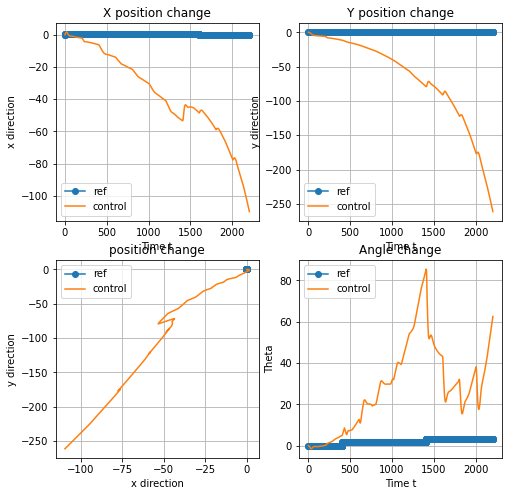

Point 15 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
284.1222217174012 [-109.85285973 -261.73536936   62.52464784] [-0.50247577  0.16338302]
Point 15 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
284.5011803324742 [-110.00995088 -262.08044914   62.37474587] [-0.886423    0.21760599]
Point 15 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
284.7880328776367 [-110.1367199  -262.3383787    62.04937071] [-1.17580904  0.26556334]
Point 15 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
284.9999613582605 [-110.23908698 -262.52530442   61.57729031] [-1.37282508  0.30738508]
Point 15 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
285.15374512710724 [-110.32277786 -262.65701743   60.98668295] [-1.47996014  0.34324336]
Point 15 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
285.265669491297 [-110.39330659 -262.74886202   60.30493097] [-1.5         0.37334737]
Point 15 ,Step 7 - MSE error in lifted space,s

[0. 0.]
306.046746489436 [-118.91352492 -281.710645     58.00811766] [0.11488267 0.04543085]
Point 15 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
306.8505209653736 [-119.21348924 -282.45644486   58.5833797 ] [0.11940201 0.04870035]
Point 15 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
307.6500576020463 [-119.51214277 -283.19819847   59.14713263] [0.12123002 0.05222203]
Point 15 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
308.44487051247296 [-119.80933422 -283.93544244   59.69852441] [0.12068292 0.05593859]
Point 15 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
309.23458173261884 [-120.10494695 -284.66781587   60.23690978] [0.11806802 0.05979606]
Point 15 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
310.0189146272074 [-120.39889682 -285.39505412   60.76183699] [0.1136809  0.06374415]
Point 15 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
310.79768685503757 [-120.69112987 -286.1169

[0. 0.]
345.2237996878327 [-133.83736313 -317.93463924   78.53112374] [-0.04513291  0.10582911]
Point 15 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
345.9847869152617 [-134.12852041 -318.63773094   78.90478288] [-0.04442482  0.10540724]
Point 15 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
346.7475372913736 [-134.42033156 -319.3424603    79.27975793] [-0.04378409  0.10502489]
Point 15 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
347.5119894479075 [-134.71277699 -320.04876899   79.65591741] [-0.04321059  0.10468198]
Point 15 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
348.2780829203749 [-135.00583747 -320.75659951   80.03313169] [-0.04270336  0.10437808]
Point 15 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
349.0457586761614 [-135.29949426 -321.46589571   80.41127401] [-0.04226065  0.10411243]
Point 15 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
349.81495957787394 [-135.5

[0. 0.]
385.63882557729676 [-149.32082914 -355.26630617   97.83305847] [-0.04289055  0.10601474]
Point 15 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
386.462388500082 [-149.6369937  -356.02676595   98.21110976] [-0.04287876  0.10600927]
Point 15 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
387.2873113256891 [-149.95369796 -356.78847404   98.58940487] [-0.04286603  0.10600053]
Point 15 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
388.1136020389047 [-150.27094465 -357.55143796   98.96795589] [-0.04285265  0.10598891]
Point 15 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
388.9412680651009 [-150.58873629 -358.31566471   99.34677367] [-0.04283888  0.10597476]
Point 15 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
389.77031628854814 [-150.90707524 -359.08116076   99.72586793] [-0.04282497  0.10595842]
Point 15 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
390.6007530739134 [-151.2

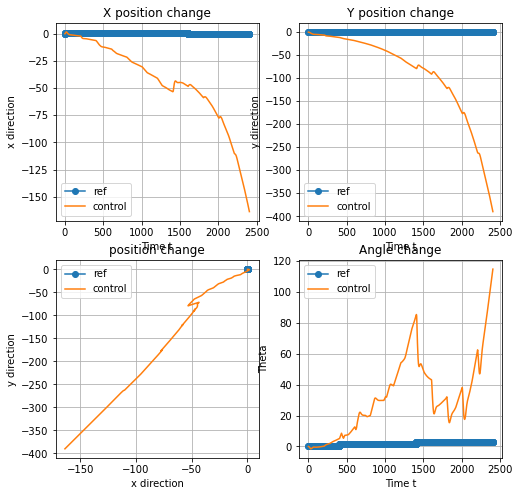

Point 16 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
423.62065654294895 [-164.00450657 -390.49500634  114.48846911] [0.01325735 0.32976478]
Point 16 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
424.0284700067037 [-164.18752907 -390.86049929  113.8342859 ] [0.06154707 0.46203974]
Point 16 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
424.3883279837106 [-164.35608001 -391.18006076  113.07008547] [0.10250837 0.5       ]
Point 16 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
424.7526401625578 [-164.52749741 -391.50324835  112.30884412] [0.13652913 0.5       ]
Point 16 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
425.12157094570625 [-164.70158144 -391.83032366  111.55135171] [0.16403904 0.5       ]
Point 16 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
425.49501199331723 [-164.87808191 -392.16127378  110.7980841 ] [0.1854987 0.5      ]
Point 16 ,Step 7 - MSE error in lifted space,state x, inp

[0. 0.]
447.45521393402515 [-174.90562364 -411.76655642   80.24466778] [-0.04896978  0.5       ]
Point 16 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
448.0058989427838 [-175.1472729  -412.26225658   79.73851296] [-0.04730782  0.5       ]
Point 16 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
448.5607282657926 [-175.39036844 -412.76184279   79.23788811] [-0.04569931  0.5       ]
Point 16 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
449.1196868815316 [-175.63490557 -413.26530076   78.7427604 ] [-0.04415896  0.5       ]
Point 16 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
449.68275871909384 [-175.88087925 -413.77261523   78.25309578] [-0.04269873  0.5       ]
Point 16 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
450.24992689934146 [-176.12828416 -414.28377016   77.76885927] [-0.04132803  0.5       ]
Point 16 ,Step 60 - MSE error in lifted space,state x, input u:
[0. 0.]
450.8211739571084 [-176.37711

[0. 0.]
482.0208689137684 [-189.6031922  -443.07805625   60.31242889] [-0.03714558  0.5       ]
Point 16 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
482.77400020586873 [-189.91622179 -443.76331778   60.05979553] [-0.0371771  0.5      ]
Point 16 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
483.5307641986408 [-190.23054535 -444.45197592   59.81137873] [-0.03720409  0.5       ]
Point 16 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
484.29115620927996 [-190.54616167 -445.14402613   59.56716105] [-0.03722723  0.5       ]
Point 16 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
485.055171552868 [-190.86306954 -445.83946385   59.32712509] [-0.03724713  0.5       ]
Point 16 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
485.82280554558713 [-191.18126774 -446.53828453   59.09125348] [-0.03726439  0.5       ]
Point 16 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
486.5940535082327 [-191.50

[0. 0.]
530.756887950153 [-209.06336261 -487.76167426   64.97849787] [-0.04546864  0.09350872]
Point 16 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
532.2554092008799 [-209.62214152 -489.15250081   66.1447827 ] [-0.04580143  0.07821644]
Point 16 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
533.774612831705 [-210.18752536 -490.56299414   67.35197676] [-0.04612017  0.06416033]
Point 16 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
535.3126377902203 [-210.75891643 -491.9913855    68.59604645] [-0.04642292  0.05135634]
Point 16 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
536.8676244067545 [-211.33571914 -493.43590681   69.8729598 ] [-0.04670793  0.03980794]
Point 16 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
538.4377308453955 [-211.91734512 -494.89480629   71.17872215] [-0.04697372  0.02950714]
Point 16 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
540.021147957437 [-212.50321

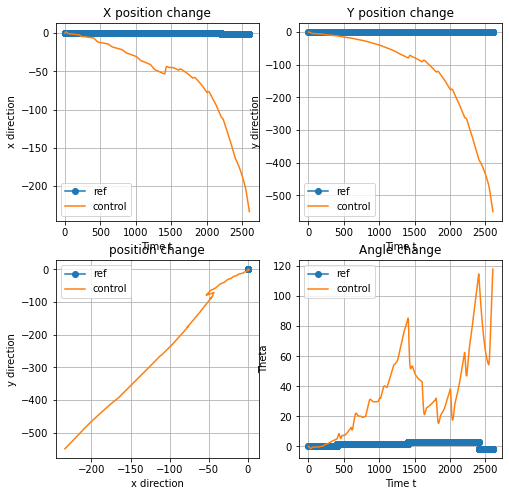

Point 17 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
598.1722092264063 [-234.15393984 -550.55036846  118.34214072] [0.00998758 0.30770249]
Point 17 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
599.1873625708181 [-234.55730085 -551.48197522  118.27959047] [0.0583902  0.45094882]
Point 17 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
600.1386759721122 [-234.94108673 -552.35253846  118.0712696 ] [0.09945478 0.5       ]
Point 17 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
601.0937721565335 [-235.32772476 -553.2260003   117.86303703] [0.13356903 0.5       ]
Point 17 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
602.0529569822874 [-235.71703604 -554.10276882  117.65589507] [0.1611626 0.5      ]
Point 17 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
603.0161786033888 [-236.10876475 -554.98289618  117.45047151] [0.1826962 0.5      ]
Point 17 ,Step 7 - MSE error in lifted space,state x, input u:

[0. 0.]
653.0851585372816 [-256.48863087 -600.72447118  111.05392844] [-0.05193816  0.5       ]
Point 17 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
654.2206925888011 [-256.94721276 -601.76339121  111.01303441] [-0.05027761  0.5       ]
Point 17 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
655.3604483950118 [-257.40732734 -602.80624684  110.97630444] [-0.0486704  0.5      ]
Point 17 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
656.5044169085783 [-257.86897196 -603.85302938  110.94371562] [-0.04713126  0.5       ]
Point 17 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
657.6525880081622 [-258.33214356 -604.90372913  110.91524374] [-0.0456722  0.5      ]
Point 17 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
658.8049507400931 [-258.79683885 -605.95833561  110.8908636 ] [-0.04430266  0.5       ]
Point 17 ,Step 60 - MSE error in lifted space,state x, input u:
[0. 0.]
659.9614935410793 [-259.26305431 -60

[0. 0.]
718.8883579753996 [-282.8481806  -661.02024333  114.11576022] [-0.04026005  0.5       ]
Point 17 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
720.2382010681517 [-283.38536324 -662.25861702  114.26850687] [-0.04029497  0.5       ]
Point 17 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
721.5920443214219 [-283.9240253  -663.50070849  114.42456462] [-0.04032536  0.5       ]
Point 17 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
722.949888080186 [-284.46416731 -664.7465179   114.58392362] [-0.04035188  0.5       ]
Point 17 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
724.3117326727582 [-285.00578977 -665.99604538  114.74657399] [-0.04037516  0.5       ]
Point 17 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
725.6775784141136 [-285.54889321 -667.24929107  114.91250587] [-0.04039579  0.5       ]
Point 17 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
727.0474256095072 [-286.093

[0. 0.]
807.339616179178 [-316.79196664 -742.70323619  157.32800514] [-0.05193658 -0.05664132]
Point 17 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
809.6110619135725 [-317.63297519 -744.81391961  159.19196666] [-0.05203229 -0.05845197]
Point 17 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
811.8842776678434 [-318.47465232 -746.92623837  161.05399665] [-0.05210383 -0.05935007]
Point 17 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
814.1580666947169 [-319.31662527 -749.03905052  162.91148579] [-0.05215202 -0.05940785]
Point 17 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
816.4313420552929 [-320.15855663 -751.15131844  164.76206228] [-0.05217783 -0.05869865]
Point 17 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
818.7031267631821 [-321.00014425 -753.26210902  166.60359219] [-0.05218242 -0.05729613]
Point 17 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
820.9725529414679 [-321.841

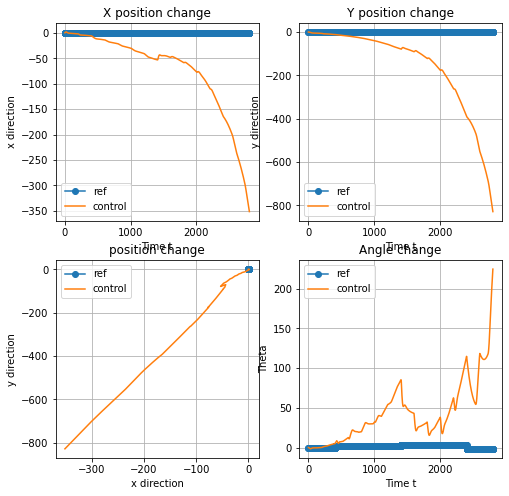

Point 18 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
901.6731653495456 [-352.1295486  -830.3837814   225.23031563] [0.00686717 0.28651346]
Point 18 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
903.3117793076196 [-352.77246056 -831.89100991  225.4565906 ] [0.05527994 0.4399637 ]
Point 18 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
904.872279582801 [-353.391166   -833.32365984  225.50429597] [0.09635697 0.5       ]
Point 18 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
906.4373328458715 [-354.01313404 -834.75987231  225.55175671] [0.13048548 0.5       ]
Point 18 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
908.007354064023 [-354.63820844 -836.20016407  225.60010219] [0.15809467 0.5       ]
Point 18 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
909.5823214129078 [-355.26612904 -837.64462157  225.65004165] [0.17964484 0.5       ]
Point 18 ,Step 7 - MSE error in lifted space,state x, input 

988.4759751392112 [-386.78017044 -909.97492731  231.51135369] [-0.05660339  0.5       ]
Point 18 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
990.2717746065474 [-387.49462733 -911.62254278  231.73241756] [-0.05491132  0.5       ]
Point 18 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
992.0729814588672 [-388.21108565 -913.27518287  231.95796273] [-0.05325478  0.5       ]
Point 18 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
993.8795908034729 [-388.92954424 -914.93284275  232.18796962] [-0.05165146  0.5       ]
Point 18 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
995.6915964154226 [-389.6500015  -916.59551636  232.42241703] [-0.0501161  0.5      ]
Point 18 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
997.5089909972907 [-390.37245547 -918.2631966   232.66128248] [-0.04866072  0.5       ]
Point 18 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
999.3317664208527 [-391.09690393 -919.9358

[0. 0.]
1088.7535805357072 [ -426.55542731 -1002.02870604   248.43048886] [-0.04331445  0.5       ]
Point 18 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
1090.8214777659082 [ -427.37278221 -1003.92823439   248.85865841] [-0.04336392  0.5       ]
Point 18 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
1092.8946998858116 [ -428.19213919 -1005.83269765   249.29053962] [-0.04340746  0.5       ]
Point 18 ,Step 108 - MSE error in lifted space,state x, input u:
[5.07033431e-19 4.52415991e-09]
1094.9738476440689 [ -429.01370095 -1007.74266241   249.72731872] [-0.04361421  0.49959523]
Point 18 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
1097.0577129339074 [ -429.8370596  -1009.65698936   250.16657947] [-0.04368793  0.5       ]
Point 18 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
1099.146907555351 [ -430.66242371 -1011.5762546    250.60952065] [-0.04375113  0.5       ]
Point 18 ,Step 111 - MSE error in lifted space,state

[0. 0.]
1223.6304749683711 [ -478.00967134 -1126.71264552   323.52409239] [-0.05575866 -0.09201458]
Point 18 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
1226.6746855619158 [ -479.15852759 -1129.53206886   325.66215054] [-0.05567159 -0.08792089]
Point 18 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
1229.714568746616 [ -480.30625756 -1132.34726795   327.78222819] [-0.0555709  -0.08352255]
Point 18 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
1232.7498287410856 [ -481.45277507 -1135.15795818   329.88365922] [-0.05545837 -0.07888531]
Point 18 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
1235.7802591720795 [ -482.59802243 -1137.9639399    331.965972  ] [-0.0553358  -0.07407127]
Point 18 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
1238.8057372423173 [ -483.74196857 -1140.76509302   334.02887677] [-0.05520493 -0.06913861]
Point 18 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
124

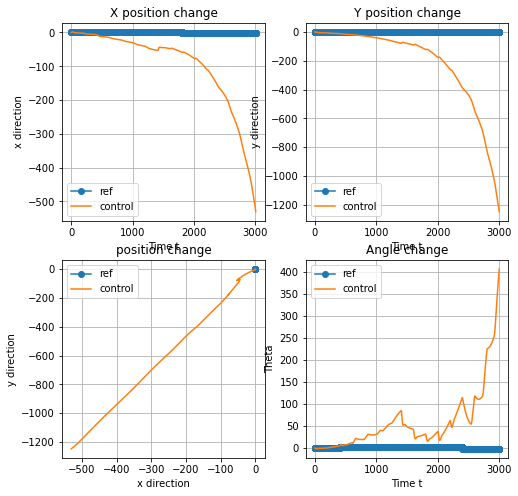

Point 19 ,Step 1 - MSE error in lifted space,state x, input u:
[0. 0.]
1357.8518514122954 [ -531.66787361 -1249.94888686   406.91784001] [0.00319496 0.25498139]
Point 19 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
1360.3350094757186 [ -532.60480664 -1252.24880597   407.40198135] [0.05168196 0.42382941]
Point 19 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
1362.7265375569943 [ -533.47038976 -1254.47948468   407.64783785] [0.09283385 0.5       ]
Point 19 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
1365.1240713713253 [ -534.33849341 -1256.71561324   407.89281743] [0.12703675 0.5       ]
Point 19 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
1367.5281622651798 [ -535.20945173 -1258.95764878   408.13846587] [0.15471892 0.5       ]
Point 19 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
1369.9388198680651 [ -536.08334671 -1261.20556701   408.38579415] [0.17633982 0.5       ]
Point 19 ,Step 7 - MSE error in li

[0. 0.]
1487.2741734640404 [ -580.75146904 -1369.71326842   424.76730475] [-0.06128594  0.5       ]
Point 19 ,Step 53 - MSE error in lifted space,state x, input u:
[0. 0.]
1489.9786055573798 [ -581.82640003 -1372.19498929   425.25635153] [-0.05958382  0.5       ]
Point 19 ,Step 54 - MSE error in lifted space,state x, input u:
[0. 0.]
1492.6904127718353 [ -582.90410331 -1374.68354502   425.75087193] [-0.0578961  0.5      ]
Point 19 ,Step 55 - MSE error in lifted space,state x, input u:
[0. 0.]
1495.4095947135208 [ -583.98457935 -1377.17893499   426.25084794] [-0.0562436  0.5      ]
Point 19 ,Step 56 - MSE error in lifted space,state x, input u:
[0. 0.]
1498.1361494764717 [ -585.06782811 -1379.68115715   426.75625972] [-0.054644  0.5     ]
Point 19 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
1500.8700739043925 [ -586.1538491  -1382.19020829   427.26708588] [-0.05311209  0.5       ]
Point 19 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
1503.61136383654

[3.78397626e-19 4.26449182e-09]
1634.5516185758916 [ -639.10250232 -1504.94143164   456.26693107] [-0.04700899  0.4997426 ]
Point 19 ,Step 104 - MSE error in lifted space,state x, input u:
[-1.46837291e-19  4.27683833e-09]
1637.6306915085013 [ -640.31910897 -1507.76999624   457.01153225] [-0.04739473  0.49992772]
Point 19 ,Step 105 - MSE error in lifted space,state x, input u:
[0. 0.]
1640.724371520312 [ -641.54095816 -1510.6122039    457.77653374] [-0.04765789  0.49454765]
Point 19 ,Step 106 - MSE error in lifted space,state x, input u:
[0. 0.]
1643.8387116775136 [ -642.77007551 -1513.47377063   458.57483634] [-0.04792245  0.48479005]
Point 19 ,Step 107 - MSE error in lifted space,state x, input u:
[0. 0.]
1646.9790340682616 [ -644.00821987 -1516.35973155   459.41794737] [-0.04819342  0.47112622]
Point 19 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
1650.1500266958835 [ -645.25692639 -1519.27452792   460.3160081 ] [-0.04847502  0.4540207 ]
Point 19 ,Step 109 - MSE e

[0. 0.]
1829.2412164150192 [ -721.43995587 -1681.48083735   565.80074543] [-0.05854769 -0.10152195]
Point 19 ,Step 155 - MSE error in lifted space,state x, input u:
[0. 0.]
1833.3545733765627 [ -723.28891762 -1685.16354708   568.35696818] [-0.05839171 -0.09616182]
Point 19 ,Step 156 - MSE error in lifted space,state x, input u:
[0. 0.]
1837.4652919671444 [ -725.1334544  -1688.84524842   570.89219712] [-0.05823405 -0.09088552]
Point 19 ,Step 157 - MSE error in lifted space,state x, input u:
[0. 0.]
1841.5735871459126 [ -726.9737259  -1692.52610855   573.40692624] [-0.0580762  -0.08573244]
Point 19 ,Step 158 - MSE error in lifted space,state x, input u:
[0. 0.]
1845.67972010427 [ -728.80992642 -1696.20633005   575.90176301] [-0.05791956 -0.08073744]
Point 19 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
1849.783992119194 [ -730.6422802  -1699.88614614   578.37741334] [-0.05776542 -0.07593088]
Point 19 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
1853.

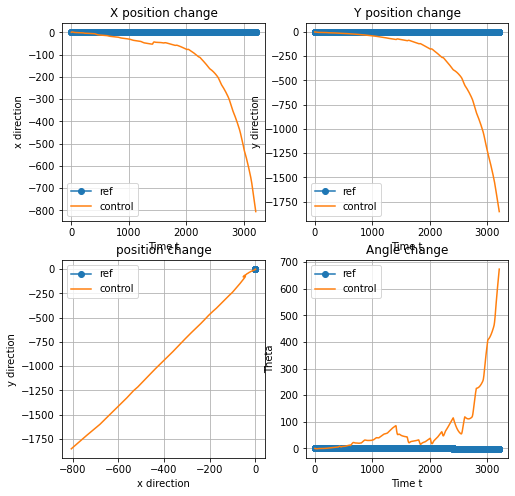

Point 20 ,Step 1 - MSE error in lifted space,state x, input u:
[0.         0.01123993]
2025.943341999698 [ -807.80987015 -1857.9261661    676.75818556] [ 0.7376195  -0.36246038]
Point 20 ,Step 2 - MSE error in lifted space,state x, input u:
[0. 0.]
2030.936037333582 [ -810.17592195 -1862.34158071   680.60417906] [ 1.25845966 -0.5       ]
Point 20 ,Step 3 - MSE error in lifted space,state x, input u:
[0. 0.]
2035.9559972392153 [ -812.55483433 -1866.78104337   684.47923365] [ 1.5 -0.5]
Point 20 ,Step 4 - MSE error in lifted space,state x, input u:
[0. 0.]
2040.9809601246664 [ -814.93474248 -1871.22543941   688.35369524] [ 1.5 -0.5]
Point 20 ,Step 5 - MSE error in lifted space,state x, input u:
[0. 0.]
2046.01120563073 [ -817.31561208 -1875.67509015   692.22608429] [ 1.5 -0.5]
Point 20 ,Step 6 - MSE error in lifted space,state x, input u:
[0. 0.]
2051.0462069554187 [ -819.69711095 -1880.12956718   696.09494637] [ 1.5 -0.5]
Point 20 ,Step 7 - MSE error in lifted space,state x, input u:
[0.

[0. 0.]
2307.0506473889027 [ -938.1529253  -2107.688729     878.63695633] [ 1.5 -0.5]
Point 20 ,Step 57 - MSE error in lifted space,state x, input u:
[0. 0.]
2312.24226250581 [ -940.49109254 -2112.33065247   882.01820732] [ 1.5 -0.5]
Point 20 ,Step 58 - MSE error in lifted space,state x, input u:
[0. 0.]
2317.4389163648334 [ -942.8301191  -2116.97767999   885.39385876] [ 1.5 -0.5]
Point 20 ,Step 59 - MSE error in lifted space,state x, input u:
[0. 0.]
2322.0399937836673 [ -944.72942029 -2121.16855888   887.30594546] [ 1.49348105 -0.5       ]
Point 20 ,Step 60 - MSE error in lifted space,state x, input u:
[0. 0.]
2326.602353157612 [ -946.5979558  -2125.33075539   889.10879055] [ 1.46807481 -0.5       ]
Point 20 ,Step 61 - MSE error in lifted space,state x, input u:
[0. 0.]
2331.170831900081 [ -948.46890597 -2129.49857523   890.91282008] [ 1.42649349 -0.5       ]
Point 20 ,Step 62 - MSE error in lifted space,state x, input u:
[0. 0.]
2335.7446203085888 [ -950.34191293 -2133.67129142   89

[0. 0.]
2547.435162121056 [-1036.90938937 -2326.85298707   974.59910236] [-0.05119203 -0.5       ]
Point 20 ,Step 108 - MSE error in lifted space,state x, input u:
[0. 0.]
2552.3362612333663 [-1038.91296304 -2331.32585574   976.48606765] [-0.04330893 -0.5       ]
Point 20 ,Step 109 - MSE error in lifted space,state x, input u:
[0. 0.]
2557.247195276243 [-1040.920564   -2335.80769696   978.37691073] [-0.03602867 -0.5       ]
Point 20 ,Step 110 - MSE error in lifted space,state x, input u:
[0. 0.]
2562.1679450382644 [-1042.93218317 -2340.29849376   980.27160756] [-0.0293699 -0.5      ]
Point 20 ,Step 111 - MSE error in lifted space,state x, input u:
[0. 0.]
2567.098490777421 [-1044.94781122 -2344.79822867   982.17013355] [-0.02334082 -0.5       ]
Point 20 ,Step 112 - MSE error in lifted space,state x, input u:
[0. 0.]
2572.0388127869946 [-1046.96743882 -2349.30688428   984.07246405] [-0.01794035 -0.5       ]
Point 20 ,Step 113 - MSE error in lifted space,state x, input u:
[0. 0.]
2576.98

[0. 0.]
2809.863316842551 [-1144.18330214 -2566.35469693  1075.54272712] [-0.01400256 -0.5       ]
Point 20 ,Step 159 - MSE error in lifted space,state x, input u:
[0. 0.]
2815.2690500187578 [-1146.39279211 -2571.28827443  1077.61888882] [-0.01388354 -0.5       ]
Point 20 ,Step 160 - MSE error in lifted space,state x, input u:
[0. 0.]
2820.685151613383 [-1148.60651165 -2576.2313184   1079.69892087] [-0.01374829 -0.5       ]
Point 20 ,Step 161 - MSE error in lifted space,state x, input u:
[0. 0.]
2826.1116423734675 [-1150.82446927 -2581.18384779  1081.78283131] [-0.01360012 -0.5       ]
Point 20 ,Step 162 - MSE error in lifted space,state x, input u:
[0. 0.]
2831.5485428984844 [-1153.04667336 -2586.14588139  1083.87062805] [-0.0134421 -0.5      ]
Point 20 ,Step 163 - MSE error in lifted space,state x, input u:
[0. 0.]
2836.9958736558438 [-1155.2731323  -2591.11743789  1085.96231886] [-0.01327702 -0.5       ]
Point 20 ,Step 164 - MSE error in lifted space,state x, input u:
[0. 0.]
2842.4

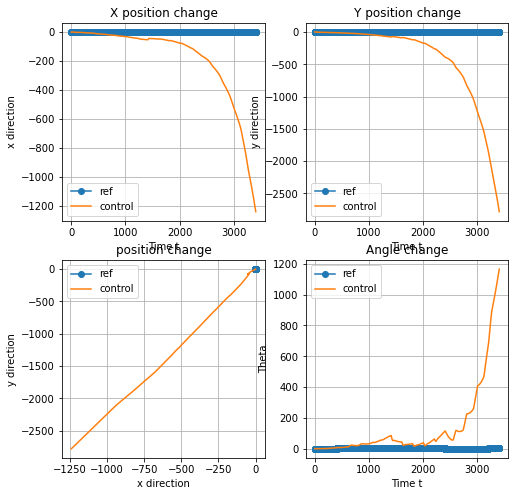

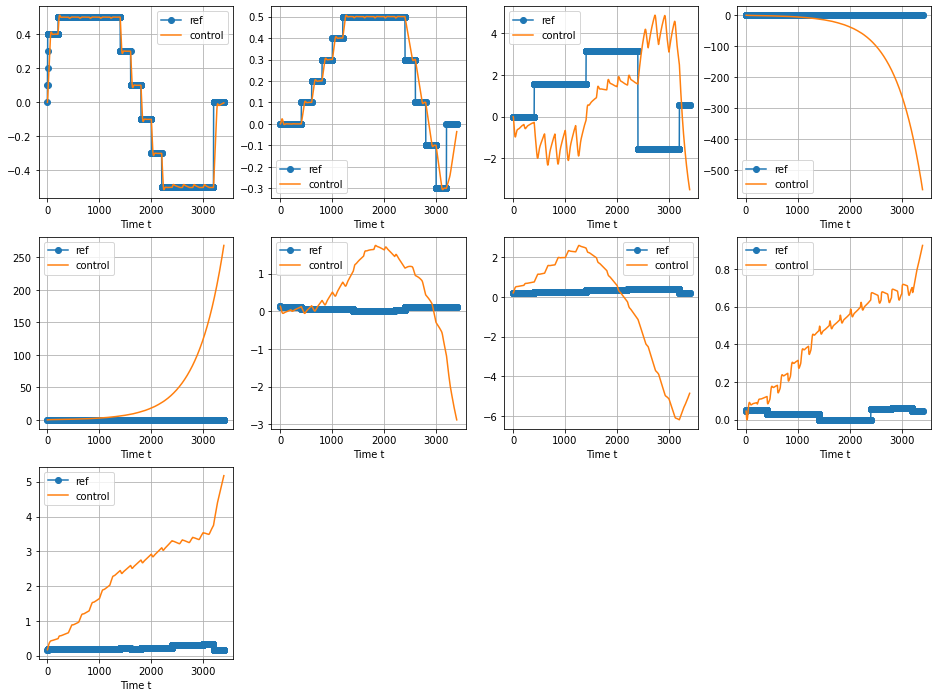

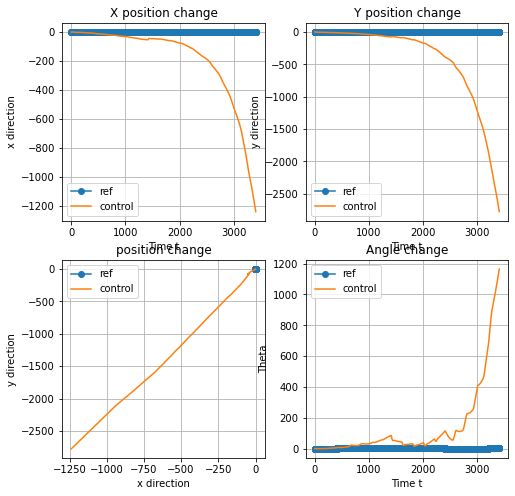

Average time needed per step is 132.8820983548777 ms.
MSE loss: 748582.3133438018
Controled path file: Q-[10. 10.  0.  0.  0.  0.  0.  0.  0.]_R-[1. 1.]_rho-0.01_Nc-15
Total time needed is 465714.80760000006 ms.


In [7]:
# get augmented matrices
model_file = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 10*np.diag(np.array([1.,1.,0.,0.,0.,0.,0.,0.,0.]))
R = 1*np.diag(np.array([1.,1.]))
rho = 0.01
# Np = 6
Nc = 15
thre = 0.05
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process_new(model_file,path_ref,u_init,x_init,Q,R,rho,Nc,thre)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

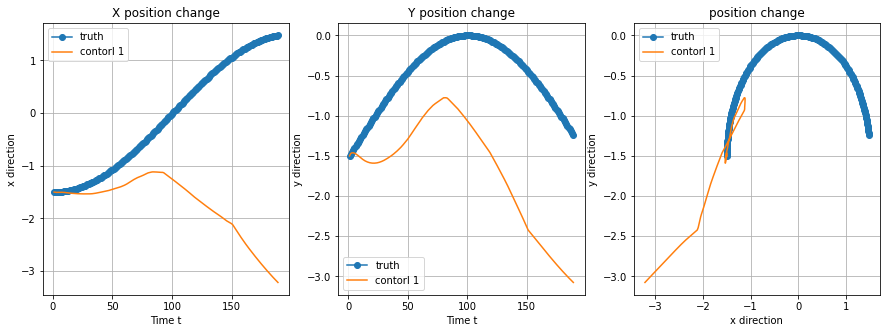

In [10]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

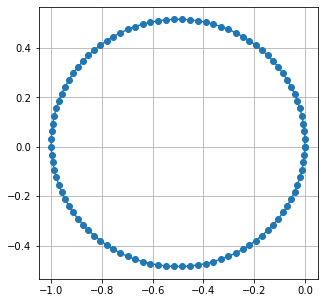

In [7]:
SimLength = 100
X = np.zeros((3,SimLength+1))
X[:,0] = np.array([0,0,np.pi/2])
u = np.array([0.5*20*np.pi/SimLength,20*np.pi/SimLength])

# start simulation as save state
for i in range(SimLength):
    X[:,i+1] = discrete_nonlinear(X[:,i],u,0.1)
plt.figure(figsize=(5,5))
plt.plot(X[0,:],X[1,:],'o-')
plt.grid(True)
plt.show()

In [58]:
(np.ones((1,5))-np.tri(1,5,0))[0]

array([0., 1., 1., 1., 1.])

In [1]:
import numpy as np
from Koopman_numpy import Koopman_numpy
from MPC import *

SimLength = 8
init_x = np.array([0.,0.,0.])
file=simulate_path(init_x,SimLength)
ref = np.load(file+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
diff = path_ref[:,1:]-path_ref[:,:-1]
angle = np.arctan2(diff[1,:],diff[0,:])
path_ref = np.r_[path_ref,np.c_[x_init[2],np.array([angle])]]

./dataset/MPC/SimLenth_8_Ts_0.1


In [2]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((9,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/lower_complex/ref_4',lifted_ref)


file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/complex/ref_4',lifted_ref)


file_name = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/unmasked/ref_4',lifted_ref)


file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/diagonal/ref_4',lifted_ref)